In [1]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 4.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=2e10eec042f6c618b907b49b7bff8d1a9b4dc855385bacf8c056824930615d6a
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [54]:
import numpy as np
import pandas as pd
import yfinance as yf
from bs4 import BeautifulSoup as bs
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json,requests,time,datetime,requests,sys
from io import StringIO

plt.rcParams["figure.figsize"] = (25,8)

In [3]:
ticker='googl'

In [6]:
df=yf.download(tickers=ticker)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-02,1459.630005,1479.030029,1447.349976,1455.599976,1455.599976,1561100
2020-10-05,1462.650024,1484.699951,1460.089966,1482.829956,1482.829956,1080100
2020-10-06,1475.500000,1484.520020,1445.010010,1451.020020,1451.020020,1304800
2020-10-07,1459.310059,1468.969971,1433.229980,1459.140015,1459.140015,1805400
2020-10-08,1465.449951,1488.030029,1465.449951,1483.430054,1483.430054,1303300


In [26]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4.064000e+03
mean,539.350163,544.423598,533.938653,539.337717,539.337717,6.880772e+06
std,388.504975,392.164751,384.842753,388.746002,388.746002,7.883104e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,5.206000e+05
25%,241.460205,244.421921,239.293045,241.361359,241.361359,1.830800e+06
50%,344.697189,348.113098,340.845856,345.257751,345.257751,4.167500e+06
75%,798.832520,803.352478,793.080017,798.182480,798.182480,8.683700e+06
max,1699.520020,1726.099976,1660.189941,1717.390015,1717.390015,8.215110e+07


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4064 entries, 2004-08-19 to 2020-10-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4064 non-null   float64
 1   High       4064 non-null   float64
 2   Low        4064 non-null   float64
 3   Close      4064 non-null   float64
 4   Adj Close  4064 non-null   float64
 5   Volume     4064 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 222.2 KB


In [28]:
dataset=df.drop(columns=['High','Low','Close','Adj Close','Volume'])

In [32]:
dataset.head()

,Open
Date,
2004-08-19,50.050049
2004-08-20,50.555557
2004-08-23,55.430431
2004-08-24,55.675674
2004-08-25,52.532532


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4064 entries, 2004-08-19 to 2020-10-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4064 non-null   float64
dtypes: float64(1)
memory usage: 63.5 KB


In [38]:
ds=dataset.reset_index()

In [39]:
ds.head()

,Date,Open
0,2004-08-19,50.050049
1,2004-08-20,50.555557
2,2004-08-23,55.430431
3,2004-08-24,55.675674
4,2004-08-25,52.532532


In [48]:
arr=ds.values

In [50]:
arr

array([[Timestamp('2004-08-19 00:00:00'), 50.050048828125],
       [Timestamp('2004-08-20 00:00:00'), 50.55555725097656],
       [Timestamp('2004-08-23 00:00:00'), 55.4304313659668],
       ...,
       [Timestamp('2020-10-06 00:00:00'), 1475.5],
       [Timestamp('2020-10-07 00:00:00'), 1459.31005859375],
       [Timestamp('2020-10-08 00:00:00'), 1465.449951171875]],
      dtype=object)

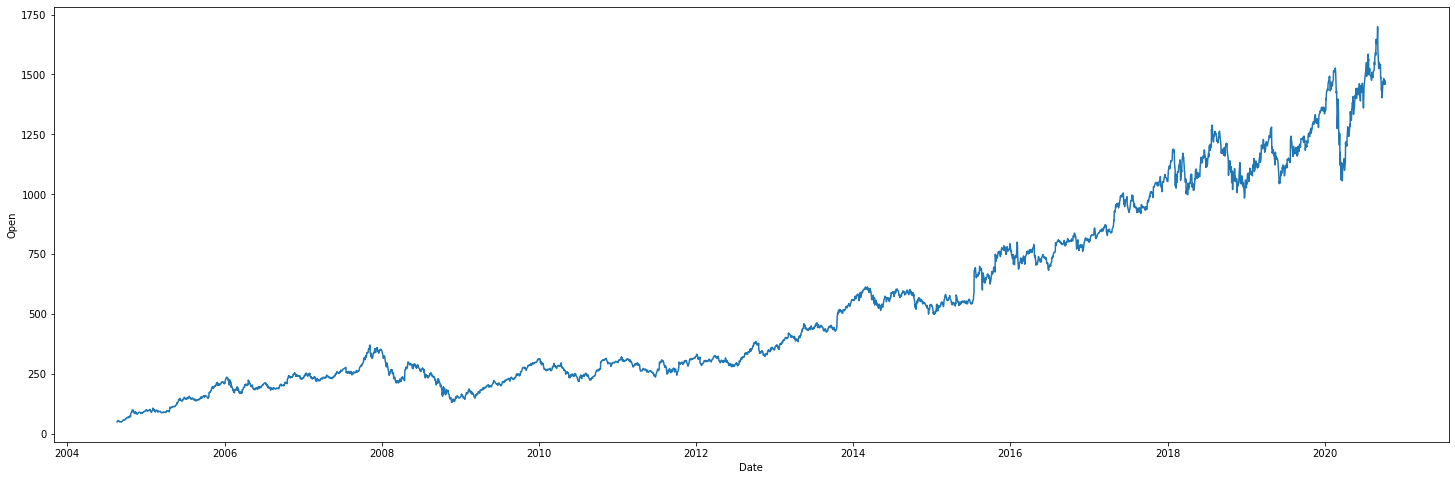

In [58]:
_=sns.lineplot(x=dataset.index,y=dataset.Open)

In [60]:
ds.tail()

,Date,Open
4059,2020-10-02,1459.630005
4060,2020-10-05,1462.650024
4061,2020-10-06,1475.500000
4062,2020-10-07,1459.310059
4063,2020-10-08,1465.449951
